<a href="https://colab.research.google.com/github/TheProgrammingArchive/Disaster-prediction/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/digit-recognizer.zip') as obj:
  obj.extractall('/content')

Prepare data for processing


In [ ]:
train_data = pd.read_csv('train.csv')
y_data = train_data['label']
del train_data['label']
X = train_data

test_data = pd.read_csv('test.csv')
X_test = test_data

Training Data processing

In [ ]:
X_data_ = []
for rows in X.iterrows():
  arr = []
  for k in rows[1]:
    arr.append(int(k))
  np_arr = np.array(arr)
  np_arr = np.resize(np_arr, (28, 28, 1))
  X_data_.append(np_arr)

Split data for test and train


In [ ]:
X_train_, y_train_ = X_data_[0: 33600], list(y_data[0: 33600])
X_test_, y_test_ = X_data_[33600:42000], list(y_data[33600:42000])

3


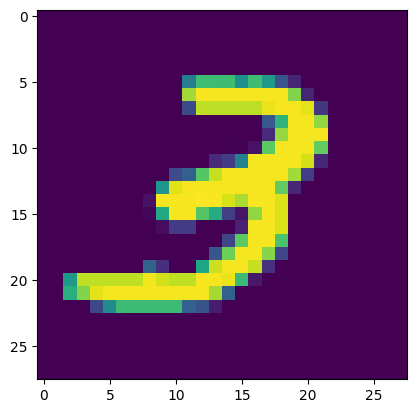

In [ ]:
plt.imshow(X_test_[545])
print(y_test_[545])

Data Generators


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   zoom_range = 0.3, rotation_range=20, shear_range=0.2,
                                   horizontal_flip=True)
train_data = train_datagen.flow(x=np.asarray(X_train_), y=y_train_, batch_size=32)

test_datagen = ImageDataGenerator(rescale=1/255, )
test_data = test_datagen.flow(x=np.asarray(X_test_), y=y_test_, batch_size=32)

Build Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,769,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,908,234 (11.09 MB)

 Trainable params: 2,908,170 (11.09 MB)

 Non-trainable params: 64 (256.00 B)

Compile model

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

Train model

In [ ]:
history = model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 127s 118ms/step - accuracy: 0.6997 - loss: 0.8968 - val_accuracy: 0.9571 - val_loss: 0.1405
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 120s 114ms/step - accuracy: 0.9067 - loss: 0.2859 - val_accuracy: 0.9662 - val_loss: 0.1069
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 141s 114ms/step - accuracy: 0.9395 - loss: 0.1942 - val_accuracy: 0.9730 - val_loss: 0.0820
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 135s 108ms/step - accuracy: 0.9507 - loss: 0.1552 - val_accuracy: 0.9742 - val_loss: 0.0799
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 119s 114ms/step - accuracy: 0.9585 - loss: 0.1352 - val_accuracy: 0.9802 - val_loss: 0.0591
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 123s 117ms/step - accuracy: 0.9601 - loss: 0.1233 - val_accuracy: 0.9801 - val_loss: 0.0585
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 140s 115ms/step - accuracy: 0.9659 - loss: 0.1069 - val_accuracy: 0.9820 - val_loss: 0.0550
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 117s 111ms/step - accuracy: 0.9

Accuracy metrics of model from epoch 1 - 10


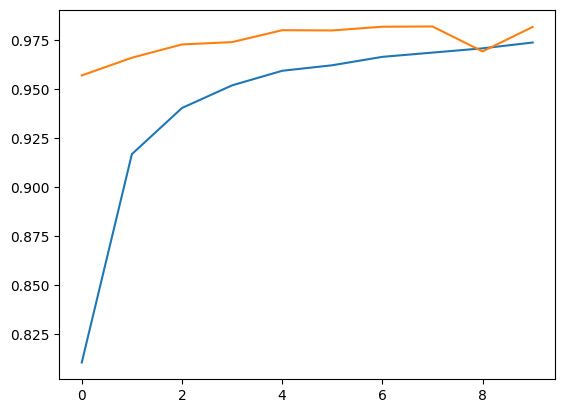

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.evaluate(test_data)

263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.9811 - loss: 0.0574


[0.05634203553199768, 0.9819047451019287]

In [ ]:
model.save('drive/MyDrive/g3.keras')

In [ ]:
val_data = pd.read_csv('test.csv')
val_data_ = []
for data in val_data.iterrows():
  arr = []
  for k in data[1]:
    arr.append(k)
  np_arr = np.array(arr)
  np_arr = np.resize(np_arr, (28, 28))
  val_data_.append(np_arr/255.)

Import model for testing


In [1]:
from keras.models import load_model

m = load_model('/content/drive/MyDrive/g3.keras')

Loop over a few model predictions

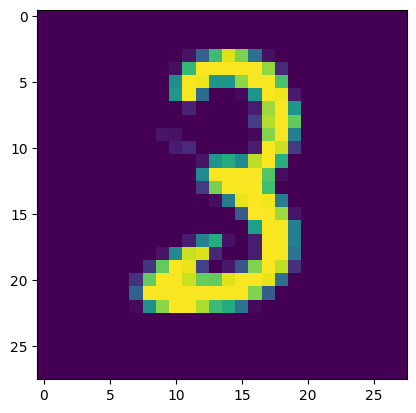

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3


In [ ]:
from IPython.display import clear_output

import time
for k in range(5):
  clear_output()
  plt.imshow(val_data_[k])
  plt.show()
  z = np.expand_dims(val_data_[k], axis=0)
  print(np.argmax(m.predict(z)))

  time.sleep(1)